# Regression Using StatsModels
- Run a regression to find beta and alpha of FB to SPY
- FB<sub>t</sub> ~ $\beta$ * SPY<sub>t</sub> + $\alpha$ + e<sub>t</sub>

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import yfinance as yf 

# pip install yfinance
# https://pypi.org/project/yfinance/

In [2]:
# download price data
univ = ['SPY','META']
px = yf.download(univ, start="2016-01-01")['Adj Close']

[*********************100%***********************]  2 of 2 completed


In [3]:
px

Ticker,META,SPY
Date,,
2016-01-04 00:00:00+00:00,101.913155,172.953018
2016-01-05 00:00:00+00:00,102.421623,173.245544
2016-01-06 00:00:00+00:00,102.660904,171.060211
2016-01-07 00:00:00+00:00,97.626060,166.956223
2016-01-08 00:00:00+00:00,97.037827,165.123627
...,...,...
2024-11-19 00:00:00+00:00,561.090027,590.299988
2024-11-20 00:00:00+00:00,565.520020,590.500000
2024-11-21 00:00:00+00:00,563.090027,593.669983


In [4]:
# get returns
ret = px / px.shift() - 1
ret

Ticker,META,SPY
Date,,
2016-01-04 00:00:00+00:00,NaN,NaN
2016-01-05 00:00:00+00:00,0.004989,0.001691
2016-01-06 00:00:00+00:00,0.002336,-0.012614
2016-01-07 00:00:00+00:00,-0.049043,-0.023991
2016-01-08 00:00:00+00:00,-0.006025,-0.010977
...,...,...
2024-11-19 00:00:00+00:00,0.012067,0.003655
2024-11-20 00:00:00+00:00,0.007895,0.000339
2024-11-21 00:00:00+00:00,-0.004297,0.005368


In [5]:
# set X and Y. Have to add constant
X = ret[['SPY']]
X = sm.add_constant(X)

Y = ret['META']

In [6]:
# observe x,y
print (X)
print (Y)

                           const       SPY
Date                                      
2016-01-04 00:00:00+00:00    1.0       NaN
2016-01-05 00:00:00+00:00    1.0  0.001691
2016-01-06 00:00:00+00:00    1.0 -0.012614
2016-01-07 00:00:00+00:00    1.0 -0.023991
2016-01-08 00:00:00+00:00    1.0 -0.010977
...                          ...       ...
2024-11-19 00:00:00+00:00    1.0  0.003655
2024-11-20 00:00:00+00:00    1.0  0.000339
2024-11-21 00:00:00+00:00    1.0  0.005368
2024-11-22 00:00:00+00:00    1.0  0.003099
2024-11-25 00:00:00+00:00    1.0  0.003392

[2240 rows x 2 columns]
Date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00    0.004989
2016-01-06 00:00:00+00:00    0.002336
2016-01-07 00:00:00+00:00   -0.049043
2016-01-08 00:00:00+00:00   -0.006025
                               ...   
2024-11-19 00:00:00+00:00    0.012067
2024-11-20 00:00:00+00:00    0.007895
2024-11-21 00:00:00+00:00   -0.004297
2024-11-22 00:00:00+00:00   -0.007015
2024-11-25 00:00:00+00:00    0.

In [7]:
# can't do this - missing data
results = sm.OLS(Y, X).fit()

MissingDataError: exog contains inf or nans

In [8]:
# drop data
X = X.dropna()
Y = Y.dropna()
results = sm.OLS(Y, X).fit()

In [9]:
# check summary
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   META   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     1280.
Date:                Mon, 25 Nov 2024   Prob (F-statistic):          4.38e-222
Time:                        20:16:06   Log-Likelihood:                 5647.0
No. Observations:                2239   AIC:                        -1.129e+04
Df Residuals:                    2237   BIC:                        -1.128e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      0.631      0.528      -0.001       0.001
SPY            1.3050      0.036     35.778      0.000       1.233       1.377
==============================================================================
Omnibus:                      796.011   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           130990.899
Skew:                          -0.529   Prob(JB):                         0.00
Kurtosis:                      40.456   Cond. No.                         88.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# get params
results.params

const    0.000260
SPY      1.305028
dtype: float64

In [11]:
# get tvalues
results.tvalues

const     0.631268
SPY      35.778327
dtype: float64

Reconstruct FB
- FB<sub>t</sub> ~ $\beta$ * SPY<sub>t</sub> + $\alpha$ + e<sub>t</sub>

In [12]:
FB = results.params['SPY']*X['SPY'] + results.params['const'] + results.resid

In [13]:
# basically identical
(FB-Y).abs().sum()

7.247349421979354e-16

In [14]:
beta_contr = results.params['SPY']*X['SPY']
prediction = results.params['SPY']*X['SPY'] + results.params['const']
alpha_contr = results.params['const'] + results.resid

In [15]:
alpha_contr

Date
2016-01-05 00:00:00+00:00    0.002782
2016-01-06 00:00:00+00:00    0.018798
2016-01-07 00:00:00+00:00   -0.017734
2016-01-08 00:00:00+00:00    0.008299
2016-01-11 00:00:00+00:00    0.000558
                               ...   
2024-11-19 00:00:00+00:00    0.007297
2024-11-20 00:00:00+00:00    0.007453
2024-11-21 00:00:00+00:00   -0.011303
2024-11-22 00:00:00+00:00   -0.011060
2024-11-25 00:00:00+00:00    0.006250
Length: 2239, dtype: float64

<Axes: xlabel='Date'>

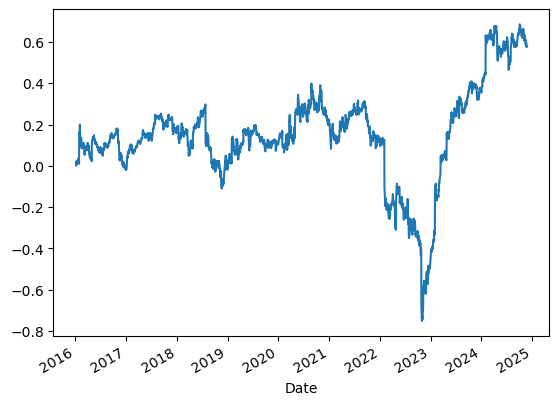

In [16]:
alpha_contr.cumsum().plot()

In [17]:
# correl is zero to spy
alpha_contr.corr(X['SPY'])

-3.7669506422081165e-16

In [18]:
# "alpha"
alpha_contr.mean()

0.0002596942799677939

In [19]:
# information ratio
alpha_contr.mean()/alpha_contr.std()*np.sqrt(252)

0.21214672354168598

In [20]:
# alpha t-stat
results.tvalues['const']

0.6312682813553395